In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in Data

In [2]:
data_feat = pd.read_csv("train_features.csv")
data_labels = pd.read_csv("train_labels.csv")

pd.set_option('display.max_columns', None)


In [3]:
data_feat.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Left-align the table below instead of centered which is default in Markdown:

In [6]:
%%html
<style>
table {float:left}
</style>

| Column_name   | Description
|:-|:---------------------------------------------------------
| amount_tsh  | Total static head (amount water available to waterpoint)|
| date_recorded | The date the row was entered |
| funder | Who funded the well |
| gps_height | Altitude of the well |
| installer | Organization that installed the well |
| longitude | GPS coordinate |
| latitude | GPS coordinate  |
| wpt_name | Name of the waterpoint if there is one |
| num_private |  N/A |
| basin | Geographic water basin |
| subvillage | Geographic location |
| region | Geographic location |
| region_code | Geographic location (coded) |
| district_code | Geographic location (coded) |
| lga |  Geographic location  |
| ward | Geographic location |
| population | Population around the well |
| public_meeting | True/False |
| recorded_by | Group entering this row of data |
| scheme_management | Who operates the waterpoint |
| scheme_name | Who operates the waterpoint |
| permit | If the waterpoint is permitted |
| construction_year | Year the waterpoint was constructed |
| extraction_type | The kind of extraction the waterpoint uses |
| extraction_type_group | The kind of extraction the waterpoint uses |
| extraction_type_class | The kind of extraction the waterpoint uses  |
| management | How the waterpoint is managed  |
| management_group | How the waterpoint is managed |
| payment | What the water costs |
| payment_type | What the water costs  |
| water_quality | The quality of the water  |
| quality_group | The quality of the water  |
| quantity | The quantity of water |
| quantity_group | The quantity of water  |
| source | The source of the water  |
| source_type | The source of the water  |
| source_class | The source of the water  |
| waterpoint_type | The kind of waterpoint |
| waterpoint_type_group | The kind of waterpoint |

Join the features csv with the labels csv into one training dataframe.

In [52]:
df = data_feat.merge(data_labels, on="id")
df.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
6385,48284,300.0,2013-03-10,Government Of Tanzania,1463,Central govt,37.674448,-3.620035,Zahanati,0,Pangani,Mriti Kati,Kilimanjaro,3,2,Mwanga,Mwaniko,200,True,GeoData Consultants Ltd,Water Board,Vulue water supply,False,1972,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
14619,35385,0.0,2013-01-29,Mdrdp,1839,MDRDP,35.590574,-3.935873,Kwa Daniel Peter Naze,0,Internal,Mangoya,Manyara,21,3,Mbulu,Kainam,341,True,GeoData Consultants Ltd,VWC,NaN,True,1997,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,functional
5920,47844,500.0,2011-03-03,Tasaf,2117,TWE,34.776441,-9.473895,none,0,Rufiji,Mwanyago,Iringa,11,4,Njombe,Uwemba,25,True,GeoData Consultants Ltd,VWC,Nyamag,False,2009,submersible,submersible,submersible,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
52007,4659,0.0,2011-03-07,Dwe,1704,DWE,34.937917,-9.339059,none,0,Rufiji,Wangamaganga,Iringa,11,4,Njombe,Yakobi,40,True,GeoData Consultants Ltd,VWC,Lukwal,False,2008,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
4235,17076,0.0,2013-03-20,Danida,1054,MWE,35.736504,-10.585586,Kwa Mzee Ngauya,0,Lake Nyasa,Barabarani A,Ruvuma,10,4,Songea Rural,Tanga,0,False,GeoData Consultants Ltd,Other,NaN,True,1990,india mark ii,india mark ii,handpump,other,other,pay when scheme fails,on failure,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,functional


## Exploratory Data Analysis



In [12]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

The dataframe contains 41 columns and 59400 rows. There are null-values present in the following features:
* funder (object)
* installer (object)
* subvillage (object)
* public_meeting (object)
* scheme_management (object)
* scheme_name (object)
* permit (object)

All of the features share the same object data type and could indicate a human or equipment error. These features will require further investigation.

The data types for all features are as follows:
* 3 floats
* 7 ints
* 31 objects

The target label is also an object which will slow down our ML models further down the line compared to a category data type. The many objects data types could potentially also be converted into ones that more accurately reflect the data.

In [22]:
# pct of cells with missing values out of all cells
total_cells = np.product(df.shape)
total_missing_values = df.isnull().sum().sum()
pct_missing = (total_missing_values / total_cells * 100)
print("Percentage of cells with null-values: {0:.1f}%".format(pct_missing))

Percentage of cells with null-values: 1.9%


Around 2% of cells contain null-values. However, there may be more null-values but just represented as empty cells, "N/A" strings or something else completely. Let's investigate the values inside features we have already identified as containing null-values.

In [66]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

It appears that the largest concentration of null-values exist in scheme_name which represent who is operating the waterpoints. Perhaps this is indicative of many water pumps not being maintained nor in operation.

In [71]:
print("Funder contains {} unique entities that have funded wells in Tanzania.".format(len(df.funder.unique())))
print("\nCount of each funder in the dataset:\n{}".format(df.funder.value_counts()))

Funder contains 1898 unique entities that have funded wells in Tanzania.

Count of each funder in the dataset:
Government Of Tanzania       9084
Danida                       3114
Hesawa                       2202
Rwssp                        1374
World Bank                   1349
Kkkt                         1287
World Vision                 1246
Unicef                       1057
Tasaf                         877
District Council              843
Dhv                           829
Private Individual            826
Dwsp                          811
0                             777
Norad                         765
Germany Republi               610
Tcrs                          602
Ministry Of Water             590
Water                         583
Dwe                           484
Netherlands                   470
Hifab                         450
Adb                           448
Lga                           442
Amref                         425
Fini Water                    393
Oxfam

Notice there are 777 observations of "0" likely to represent a null-value. This is in addition to the null-values and would need to be cleaned in the data cleaning section.

In [72]:
print("Installer contains {} unique entities with the name of the organisation that installed the well.".format(len(df.installer.unique())))
print("\nCount of each installer in the dataset:\n{}".format(df.installer.value_counts()))

Installer contains 2146 unique entities with the name of the organisation that installed the well.

Count of each installer in the dataset:
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
World vision            408
LGA                     408
WEDECO                  397
TASAF                   396
District council        392
Gover                   383
AMREF                   329
TWESA                   316
WU                      301
Dmdd                    287
ACRA                    278
World Vision            270
SEMA                    249
DW                      246
OXFAM                   234
                    

Again, we have 777 counts of "0" highly likely showing that for wells where funder is missing installer also is missing.

In [73]:
print("Subvillage contains {} unique entities with the geographic location of the wells.".format(len(df.subvillage.unique())))
print("\nCount of each subvillage in the dataset:\n{}".format(df.subvillage.value_counts()))

Subvillage contains 19288 unique entities with the geographic location of the wells.

Count of each subvillage in the dataset:
Madukani         508
Shuleni          506
Majengo          502
Kati             373
Mtakuja          262
Sokoni           232
M                187
Muungano         172
Mbuyuni          164
Mlimani          152
Songambele       147
Msikitini        134
Miembeni         134
1                132
Kibaoni          114
Kanisani         111
I                109
Mapinduzi        109
Mjini            108
Mjimwema         108
Mkwajuni         104
Mwenge           102
Mabatini          98
Azimio            98
Mbugani           95
Mission           95
Bwawani           91
Bondeni           90
Chang'Ombe        88
Zahanati          86
                ... 
Ilogomelo          1
Mayadi             1
Mchesya            1
Bwipa              1
Hongi Juu          1
Sangananu          1
Nyehunyo           1
Ndondondo          1
Katyasho C         1
Kanoge B           1
Bushandwa   

The values "M", "1" and "I" appear to be null-values but required further analysis before we can determine they truly are missing values or incorrectly entered values due to human error.

In [74]:
print("Public_meeting contains {} unique entities evaluating to either True/False or null-value.".format(len(df.public_meeting.unique())))
print("\nCount of each public_meeting in the dataset:\n{}".format(df.public_meeting.value_counts()))

Public_meeting contains 3 unique entities evaluating to either True/False or null-value.

Count of each public_meeting in the dataset:
True     51011
False     5055
Name: public_meeting, dtype: int64


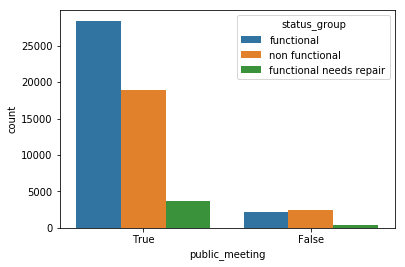

In [75]:
sns.countplot(data=df, x='public_meeting', hue='status_group')

It is not clear what public_meeting represents beyond true/false values but there are many more waterpoints that are functional or non-functional that evaluate to True in public_meeting.

In [76]:
print("Scheme_management contains {} unique entities with the names of who operates the waterpoints.".format(len(df.scheme_management.unique())))
print("\nCount of each scheme_management in the dataset:\n{}".format(df.scheme_management.value_counts()))

Scheme_management contains 13 unique entities with the names of who operates the waterpoints.

Count of each scheme_management in the dataset:
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


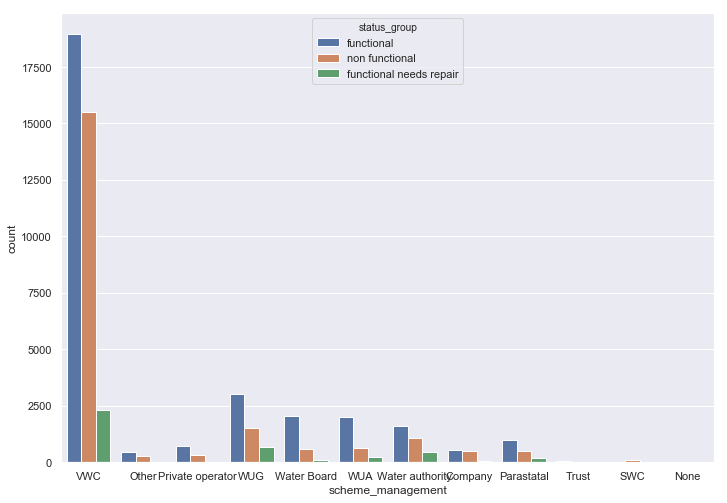

In [81]:
sns.countplot(data=df, x='scheme_management', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})